   review/score  label
0           4.0      1
1           5.0      1
2           5.0      1
3           4.0      1
4           4.0      1


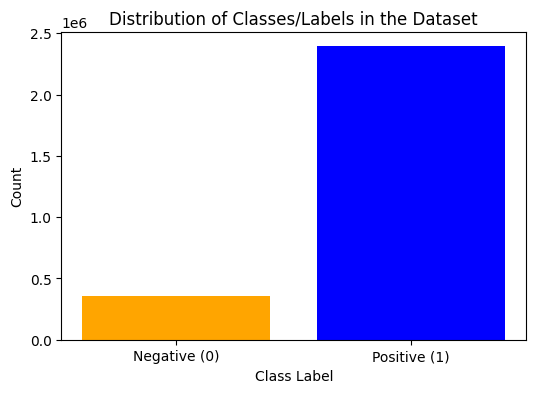

label
1    2392959
0     352746
Name: count, dtype: int64
訓練集大小: (2333849, 11)
測試集大小: (411856, 11)
Calculate the feature one CountVectorizer
Calculate the feature one TF-IDF
Combain [review/summary] & [review/text] using TfidfVectorizer
Run Naive Bayes Model
Count Vectorizer - Accuracy: 0.8822, F1: 0.7647, Training time: 0.6306s, Inference time: 0.0998s
Tfidf Vectorizer - Accuracy: 0.8824, F1: 0.5495, Training time: 0.7422s, Inference time: 0.0836s
Combined Features - Accuracy: 0.8715, F1: 0.4657, Training time: 0.4627s, Inference time: 0.0290s
Confusion Matrix for Count Vectorizer:
 [[ 36169  16743]
 [ 31787 327157]]
Confusion Matrix for Tfidf Vectorizer:
 [[  4688  48224]
 [   191 358753]]
Confusion Matrix for Combined Features:
 [[     0  52912]
 [     0 358944]]
End the Naive Bayes model
Run Decision Tree Model
Count Vectorizer - Accuracy: 0.8869, F1: 0.6370, Training time: 193.7967s, Inference time: 0.1056s
Tfidf Vectorizer - Accuracy: 0.8879, F1: 0.6305, Training time: 295.6839s,

C:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Count Vectorizer - Accuracy: 0.9179, F1: 0.7752, Training time: 1067.8803s, Inference time: 0.0586s
Tfidf Vectorizer - Accuracy: 0.9239, F1: 0.8009, Training time: 41.2690s, Inference time: 0.0450s
Combined Features - Accuracy: 0.8759, F1: 0.5226, Training time: 38.9891s, Inference time: 0.0160s
Confusion Matrix for Count Vectorizer:
 [[ 24957  27955]
 [  5858 353086]]
Confusion Matrix for Tfidf Vectorizer:
 [[ 28409  24503]
 [  6845 352099]]
Confusion Matrix for Combined Features:
 [[  3222  49690]
 [  1435 357509]]
End the LinearSVC model


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

# 讀取 CSV 檔案
# file_path = "C:/Users/USER/Downloads/NLP-Courses/NLP220/Assignments/processed_books_data.csv"
file_path = "./HW1/Books_rating.csv"
df = pd.read_csv(file_path)
# 篩選只包含 1, 2, 4, 5 星評分的資料
df_filtered = df[df['review/score'].isin([1, 2, 4, 5])]

# 新增 'label' 欄位，根據評分來分類
df_filtered['label'] = df_filtered['review/score'].apply(lambda x: 1 if x >= 4 else 0)

# 檢視結果
print(df_filtered[['review/score', 'label']].head())
#===========================================================================
# 繪製類別/標籤的分佈情況
label_counts = df_filtered['label'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(label_counts.index, label_counts.values, color=['blue', 'orange'])
plt.xticks([0, 1], ['Negative (0)', 'Positive (1)'])
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Distribution of Classes/Labels in the Dataset')

# 顯示結果
plt.show()
# 檢查正向和負向評論的分布情況
print(df_filtered['label'].value_counts())
# ==========================================================================
# 分割資料集，85% 用於訓練，15% 用於測試
train_data, test_data = train_test_split(df_filtered, test_size=0.15, random_state=42, stratify=df_filtered['label'])
# 檢查分割後的資料大小
print("訓練集大小:", train_data.shape)
print("測試集大小:", test_data.shape)
# ============================================================================
print("Calculate the 1 feature  CountVectorizer")
from sklearn.feature_extraction.text import CountVectorizer
# 移除 'review/text' 欄位中為 NaN 的列
train_data = train_data.dropna(subset=['review/text'])
test_data = test_data.dropna(subset=['review/text'])
vectorizer_count = CountVectorizer(stop_words='english', max_features=3000)
X_train_count = vectorizer_count.fit_transform(train_data['review/text'])
X_test_count = vectorizer_count.transform(test_data['review/text'])
# ============================================================================
print("Calculate the 2 feature  TF-IDF")
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = vectorizer_tfidf.fit_transform(train_data['review/text'])
X_test_tfidf = vectorizer_tfidf.transform(test_data['review/text'])
# =============================================================================
print("Calculate the 3 feature Combine  [review/summary] & [review/text] using TfidfVectorizer")
train_data['combined_text'] = train_data['review/summary'] + " " + train_data['review/text']
test_data['combined_text'] = test_data['review/summary'] + " " + test_data['review/text']
# 填補 NaN 值
train_data['combined_text'] = train_data['combined_text'].fillna('')
test_data['combined_text'] = test_data['combined_text'].fillna('')

# 使用 TfidfVectorizer 處理
vectorizer_combined = TfidfVectorizer(stop_words='english', max_features=100)
X_train_combined = vectorizer_combined.fit_transform(train_data['combined_text'])
X_test_combined = vectorizer_combined.transform(test_data['combined_text'])
print("=======================================================================================")
# =============================================================================
# Run Naive Bayes
print("Run Naive Bayes Model")
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import time

# 建立 Naive Bayes 模型
nb_model_count = MultinomialNB()
nb_model_tfidf = MultinomialNB()
nb_model_combined = MultinomialNB()

# 訓練與預測
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    # 訓練模型
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # 預測
    start_time = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_time

    # 計算評估指標
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)
    
    return accuracy, f1, cm, train_time, inference_time

# 標籤資料
y_train = train_data['label']
y_test = test_data['label']

# 訓練與評估 Count Vectorizer 特徵
acc_count, f1_count, cm_count, train_time_count, inference_time_count = train_and_evaluate(nb_model_count, X_train_count, X_test_count, y_train, y_test)

# 訓練與評估 Tfidf 特徵
acc_tfidf, f1_tfidf, cm_tfidf, train_time_tfidf, inference_time_tfidf = train_and_evaluate(nb_model_tfidf, X_train_tfidf, X_test_tfidf, y_train, y_test)

# 訓練與評估 Combined 特徵
acc_combined, f1_combined, cm_combined, train_time_combined, inference_time_combined = train_and_evaluate(nb_model_combined, X_train_combined, X_test_combined, y_train, y_test)

# 結果輸出
print("Count Vectorizer - Accuracy: {:.4f}, F1: {:.4f}, Training time: {:.4f}s, Inference time: {:.4f}s".format(acc_count, f1_count, train_time_count, inference_time_count))
print("Tfidf Vectorizer - Accuracy: {:.4f}, F1: {:.4f}, Training time: {:.4f}s, Inference time: {:.4f}s".format(acc_tfidf, f1_tfidf, train_time_tfidf, inference_time_tfidf))
print("Combined Features - Accuracy: {:.4f}, F1: {:.4f}, Training time: {:.4f}s, Inference time: {:.4f}s".format(acc_combined, f1_combined, train_time_combined, inference_time_combined))

print("Confusion Matrix for Count Vectorizer:\n", cm_count)
print("Confusion Matrix for Tfidf Vectorizer:\n", cm_tfidf)
print("Confusion Matrix for Combined Features:\n", cm_combined)
print("End the Naive Bayes model")
print("=======================================================================================")
# ===========================================================================================================================
print("Run Decision Tree Model")
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import time

# 建立 Decision Tree 模型
dt_model_count = DecisionTreeClassifier(max_depth=10,min_samples_leaf=5)
dt_model_tfidf = DecisionTreeClassifier(max_depth=10,min_samples_leaf=5)
dt_model_combined = DecisionTreeClassifier(max_depth=10,min_samples_leaf=5)

# 訓練與預測
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    # 訓練模型
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # 預測
    start_time = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_time

    # 計算評估指標
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)
    
    return accuracy, f1, cm, train_time, inference_time

# 標籤資料
y_train = train_data['label']
y_test = test_data['label']

# 訓練與評估 Count Vectorizer 特徵
acc_count, f1_count, cm_count, train_time_count, inference_time_count = train_and_evaluate(dt_model_count, X_train_count, X_test_count, y_train, y_test)

# 訓練與評估 Tfidf 特徵
acc_tfidf, f1_tfidf, cm_tfidf, train_time_tfidf, inference_time_tfidf = train_and_evaluate(dt_model_tfidf, X_train_tfidf, X_test_tfidf, y_train, y_test)

# 訓練與評估 Combined 特徵
acc_combined, f1_combined, cm_combined, train_time_combined, inference_time_combined = train_and_evaluate(dt_model_combined, X_train_combined, X_test_combined, y_train, y_test)

# 結果輸出
print("Count Vectorizer - Accuracy: {:.4f}, F1: {:.4f}, Training time: {:.4f}s, Inference time: {:.4f}s".format(acc_count, f1_count, train_time_count, inference_time_count))
print("Tfidf Vectorizer - Accuracy: {:.4f}, F1: {:.4f}, Training time: {:.4f}s, Inference time: {:.4f}s".format(acc_tfidf, f1_tfidf, train_time_tfidf, inference_time_tfidf))
print("Combined Features - Accuracy: {:.4f}, F1: {:.4f}, Training time: {:.4f}s, Inference time: {:.4f}s".format(acc_combined, f1_combined, train_time_combined, inference_time_combined))

print("Confusion Matrix for Count Vectorizer:\n", cm_count)
print("Confusion Matrix for Tfidf Vectorizer:\n", cm_tfidf)
print("Confusion Matrix for Combined Features:\n", cm_combined)
print("End the Decision Tree model")
print("=========================================================================")
# ===========================================================================================================================
print("Run LinearSVC Model")
from joblib import parallel_backend
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import time

# 建立 LinearSVC 模型
svc_model_count = LinearSVC()
svc_model_tfidf = LinearSVC()
svc_model_combined = LinearSVC()

# 訓練與預測函數
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    # 訓練模型
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # 預測
    start_time = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_time

    # 計算評估指標
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)
    
    return accuracy, f1, cm, train_time, inference_time

# 標籤資料
y_train = train_data['label']
y_test = test_data['label']

# 使用 joblib 進行多核並行運算
with parallel_backend('threading', n_jobs=-1):  # 使用所有可用的 CPU 核心
    # 訓練與評估 Count Vectorizer 特徵
    acc_count, f1_count, cm_count, train_time_count, inference_time_count = train_and_evaluate(svc_model_count, X_train_count, X_test_count, y_train, y_test)

    # 訓練與評估 Tfidf 特徵
    acc_tfidf, f1_tfidf, cm_tfidf, train_time_tfidf, inference_time_tfidf = train_and_evaluate(svc_model_tfidf, X_train_tfidf, X_test_tfidf, y_train, y_test)

    # 訓練與評估 Combined 特徵
    acc_combined, f1_combined, cm_combined, train_time_combined, inference_time_combined = train_and_evaluate(svc_model_combined, X_train_combined, X_test_combined, y_train, y_test)

# 結果輸出
print("Count Vectorizer - Accuracy: {:.4f}, F1: {:.4f}, Training time: {:.4f}s, Inference time: {:.4f}s".format(acc_count, f1_count, train_time_count, inference_time_count))
print("Tfidf Vectorizer - Accuracy: {:.4f}, F1: {:.4f}, Training time: {:.4f}s, Inference time: {:.4f}s".format(acc_tfidf, f1_tfidf, train_time_tfidf, inference_time_tfidf))
print("Combined Features - Accuracy: {:.4f}, F1: {:.4f}, Training time: {:.4f}s, Inference time: {:.4f}s".format(acc_combined, f1_combined, train_time_combined, inference_time_combined))

print("Confusion Matrix for Count Vectorizer:\n", cm_count)
print("Confusion Matrix for Tfidf Vectorizer:\n", cm_tfidf)
print("Confusion Matrix for Combined Features:\n", cm_combined)
print("End the LinearSVC model")
print("=========================================================================")